In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

**1. Data Understanding (5 marks)**

a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

b. Calculate five-point summary for numerical variables (1 MARK)

c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 MARK)

d. Generate the covariance and correlation tables for the data (1 MARK)

e. Create Visualization plots to find the relationship amongst the variables. (1 MARK)

In [2]:
df=pd.read_csv('C:/Users/HP/OneDrive/Documents/Study Documents/Unsupervised Learning/indicator_estimated_prevalence_150.csv')

In [3]:
df.head()

,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
0,Slovakia,55,56,59,59,56,51,46,42,38,35,32,30,29,26,25,21,20,20,1
1,Burkina Faso,179,196,208,221,233,246,251,271,286,308,338,368,398,419,426,421,411,403,2
2,Kyrgyzstan,90,93,93,93,101,118,141,165,147,146,156,169,153,145,139,136,135,134,1
3,Oman,40,36,29,25,22,22,15,15,14,14,13,14,13,13,12,13,13,14,1
4,Sweden,5,5,6,6,5,5,5,4,4,4,4,4,4,4,4,4,4,5,1


In [4]:
df.rename({'TB prevalence, all forms (per 100 000 population per year)' : 'Country'},axis=1,inplace=True)

In [5]:
df.head(1)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
0,Slovakia,55,56,59,59,56,51,46,42,38,35,32,30,29,26,25,21,20,20,1


In [6]:
df.shape

(150, 20)

In [7]:
cat_cols=df.dtypes[df.dtypes=='object'].index
print(cat_cols)
num_cols=df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['Country'], dtype='object')
Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       'class'],
      dtype='object')


In [8]:
df['class'].value_counts()

1    99
2    38
0    13
Name: class, dtype: int64

In [9]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [10]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,199.073333,198.606667,196.666667,194.246667,191.673333,191.493333,183.493333,185.880000,183.573333,186.826667,184.520000,185.500000,186.553333,184.326667,182.273333,179.073333,176.966667,174.866667,1.166667
std,235.147593,232.326081,228.507990,224.324996,220.587303,217.514043,192.801033,193.767865,189.695989,197.930933,202.723329,209.753795,210.561363,215.452777,216.526976,216.777407,216.983450,218.423045,0.560640
min,5.000000,5.000000,4.000000,6.000000,5.000000,5.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.000000,37.000000,35.250000,34.250000,34.250000,30.750000,30.250000,28.500000,27.000000,25.250000,26.250000,24.250000,22.250000,21.250000,20.750000,20.500000,1.000000
50%,102.000000,96.000000,92.500000,92.000000,91.000000,91.500000,91.000000,93.000000,89.500000,90.500000,87.500000,82.000000,81.000000,71.500000,71.000000,68.000000,69.000000,67.000000,1.000000
75%,310.750000,316.750000,325.000000,318.750000,315.000000,317.250000,319.500000,329.250000,337.750000,348.500000,342.500000,343.750000,354.750000,347.500000,328.000000,295.750000,289.750000,287.500000,1.750000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,698.000000,701.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000,2.000000


In [11]:
np.sum(df[df['class']==0].median())/18

606.6666666666666

In [12]:
np.sum(df[df['class']==1].median())/18

42.666666666666664

In [13]:
np.sum(df[df['class']==2].median())/18

362.19444444444446

1990


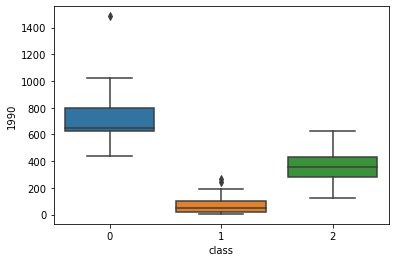

1991


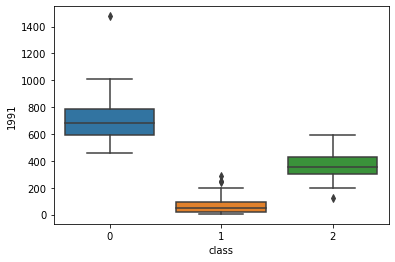

1992


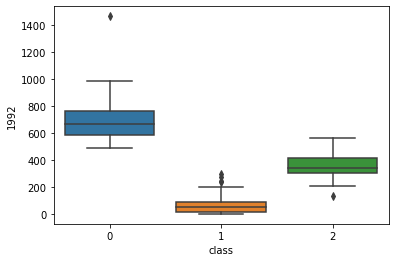

1993


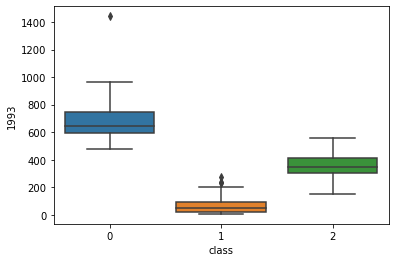

1994


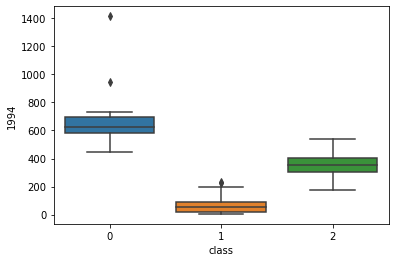

1995


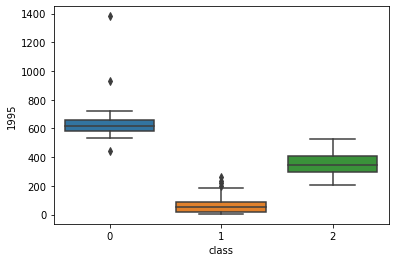

1996


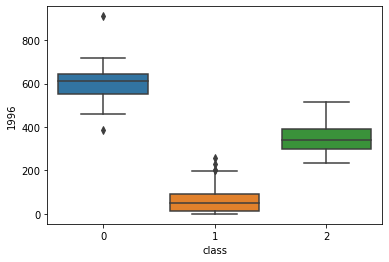

1997


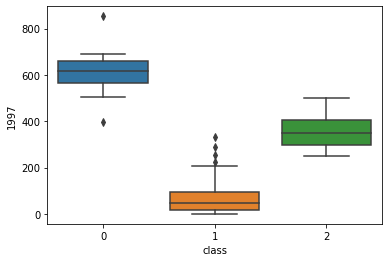

1998


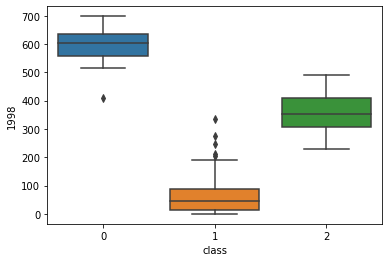

1999


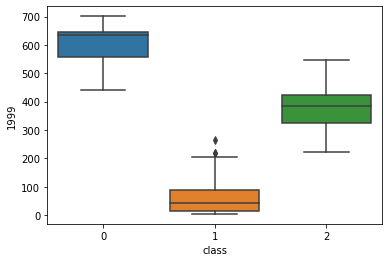

2000


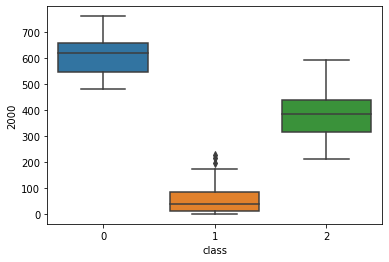

2001


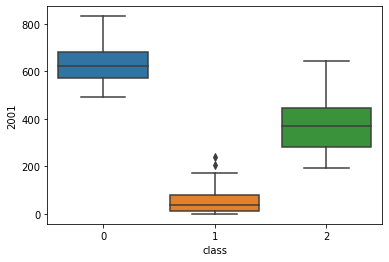

2002


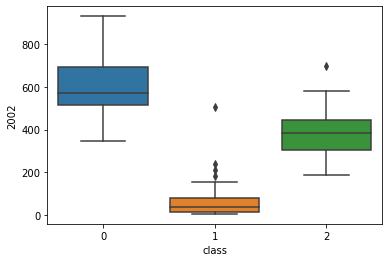

2003


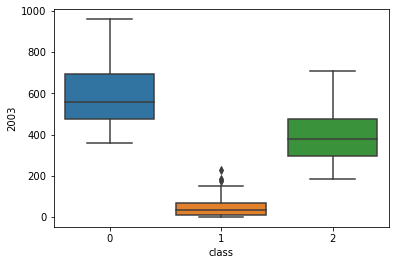

2004


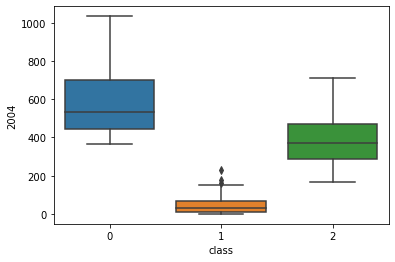

2005


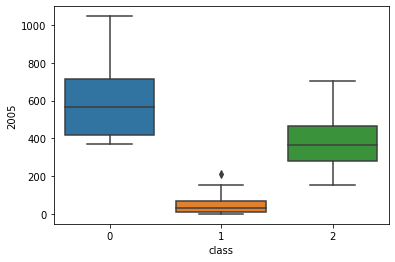

2006


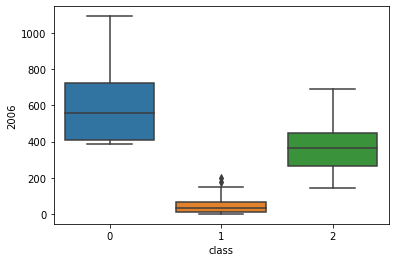

2007


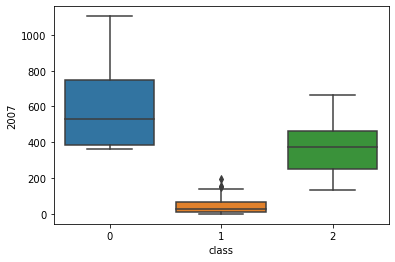

In [14]:
for col in df.columns:
    if (col!='Country') & (col!='class'):
        print(col)
        sns.boxplot(x=df['class'],y=df[col])
        plt.show()

Inferences:
1. Overall, the TB prevalence is low for patient in the class 1 where avearge across all the years across all the countries being 42
2. Highest nummber is observed in class 0 with average of 606.

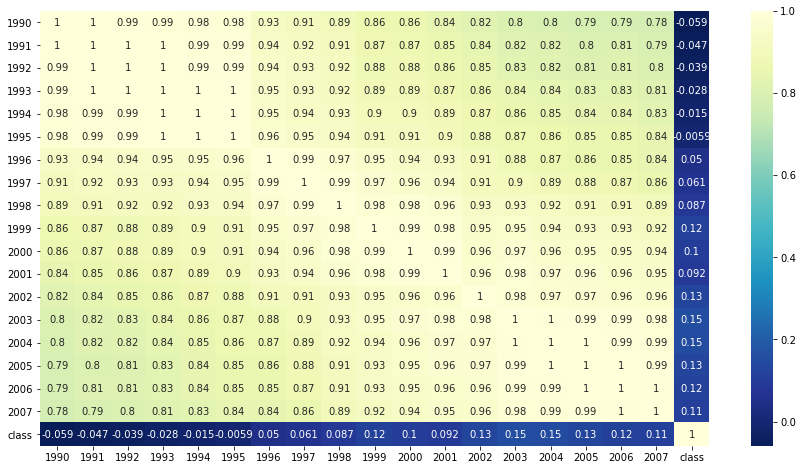

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu_r')
plt.show()

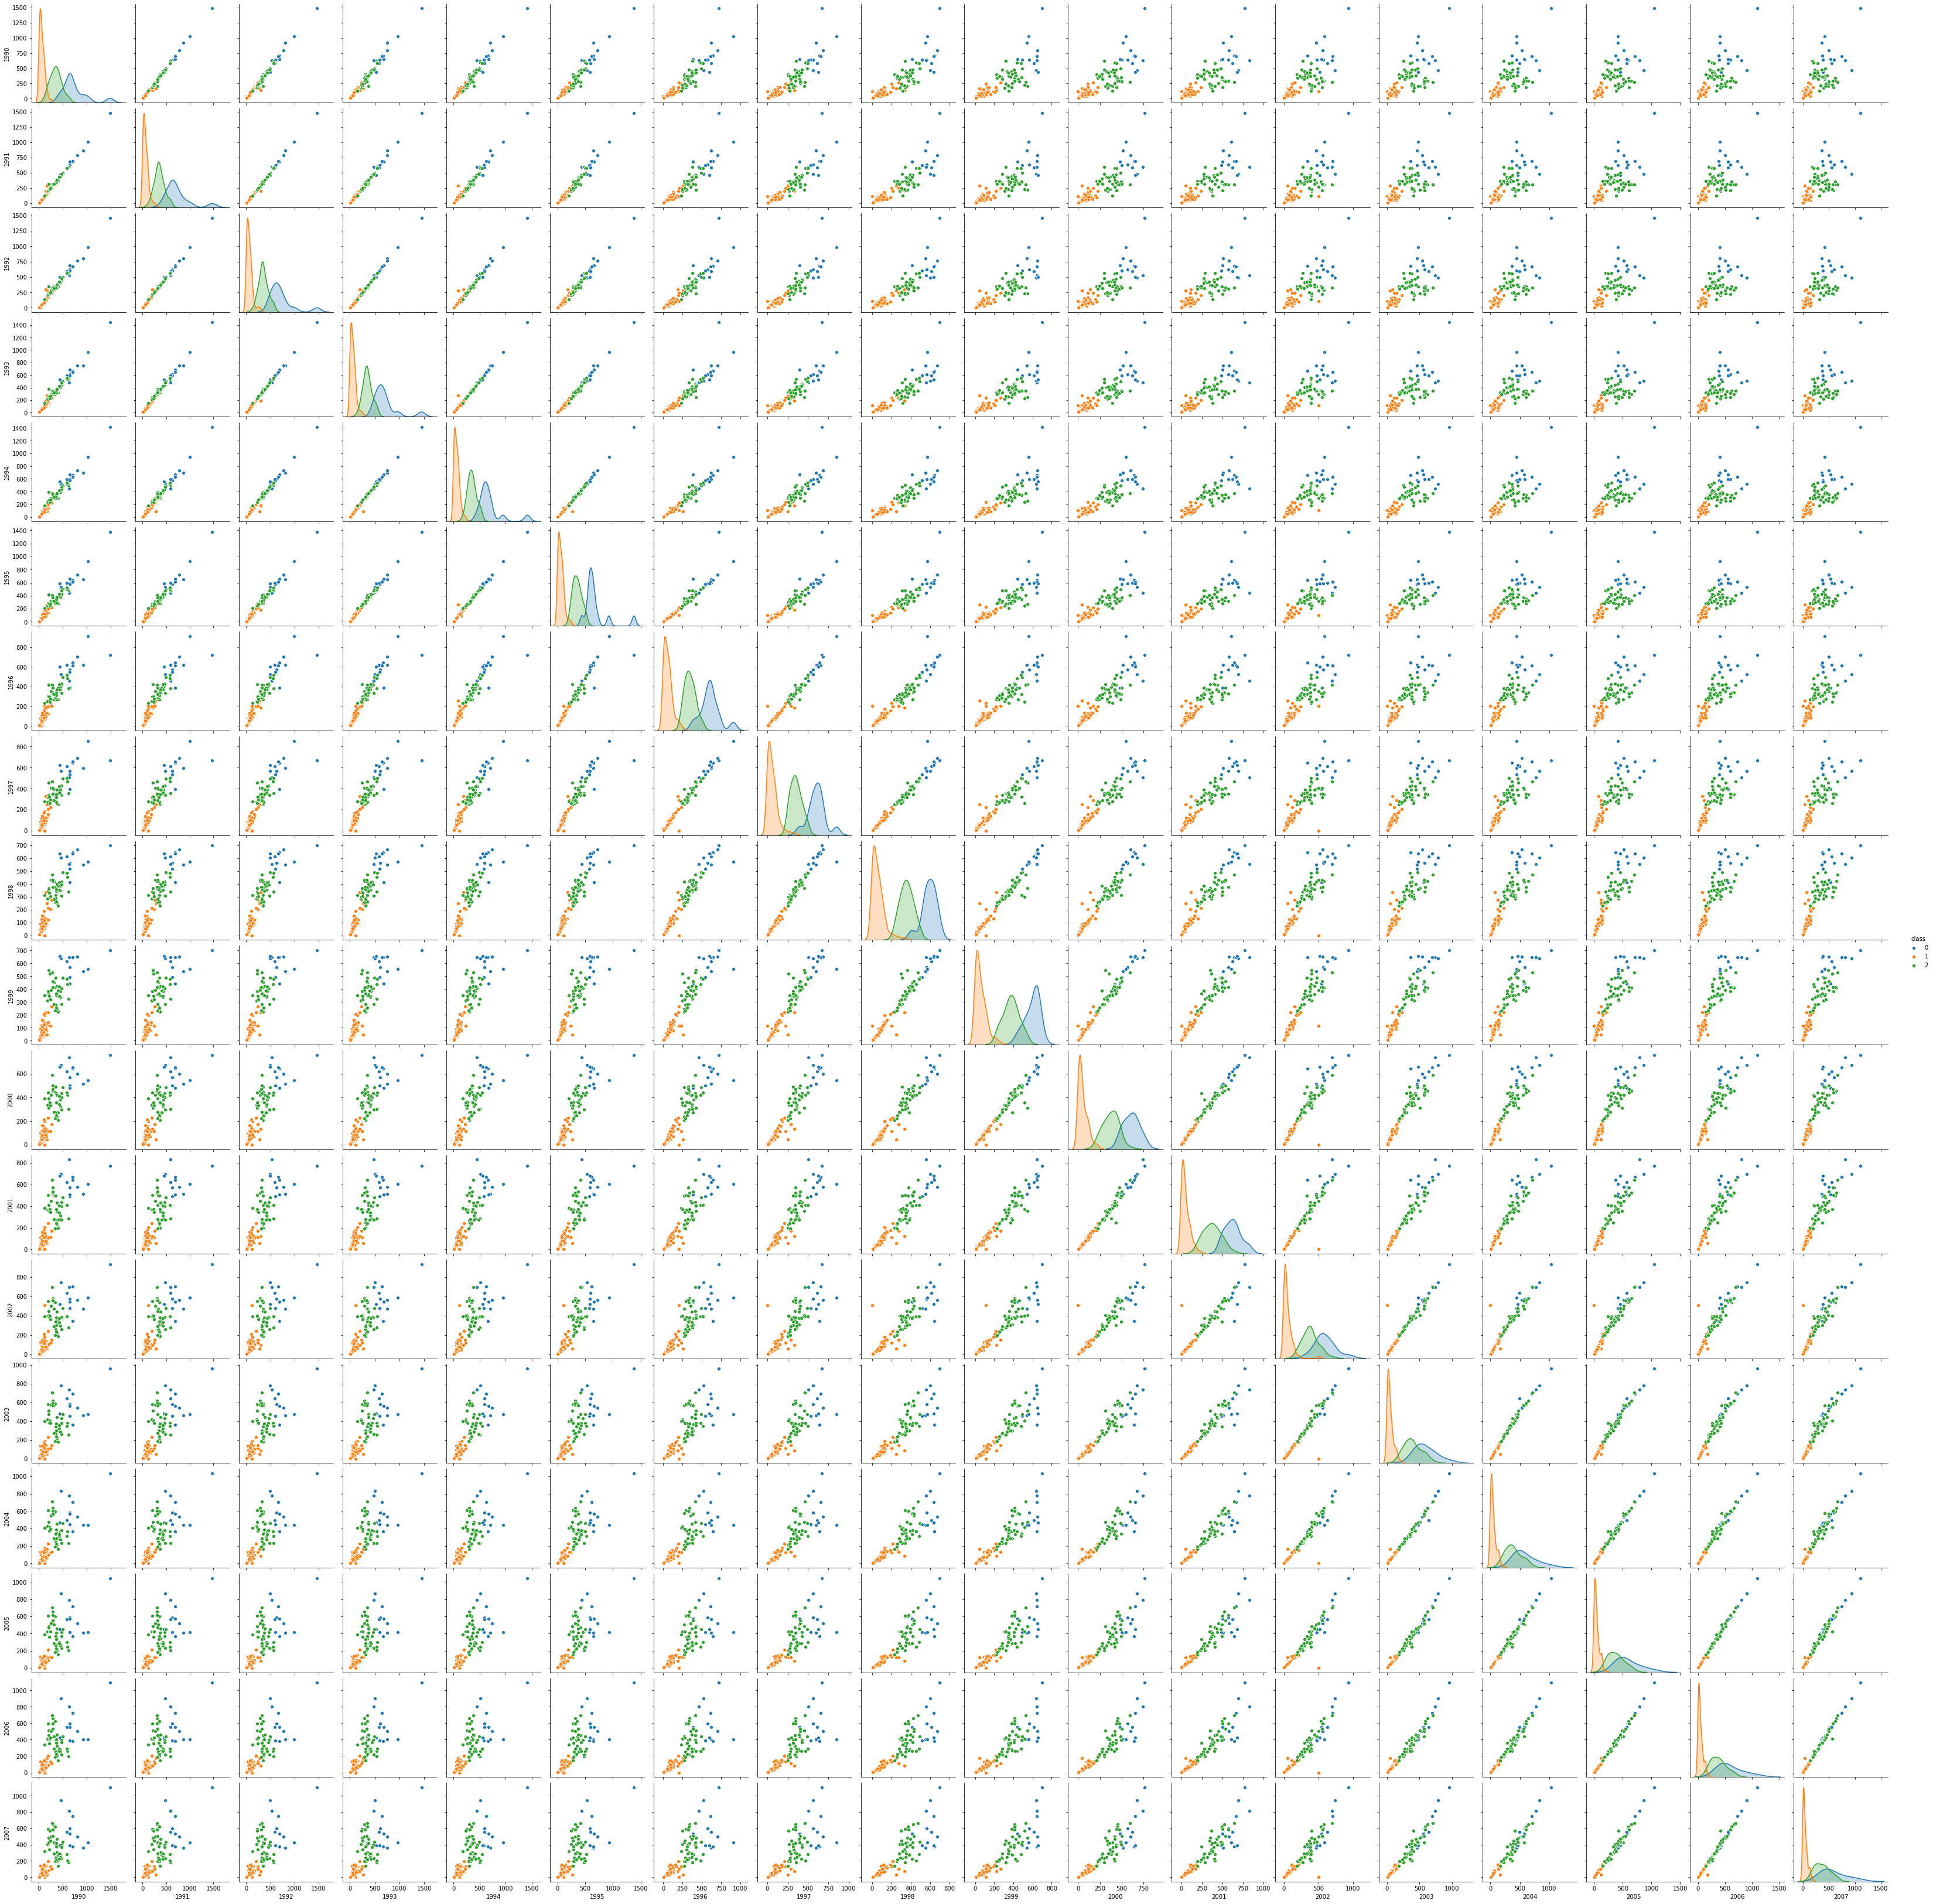

In [16]:
sns.pairplot(df,hue='class')
plt.show()

In [17]:
df.cov()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
1990,55294.390559,54477.378031,53345.360179,52206.330783,51069.473781,49974.883043,42145.836063,41469.935034,39826.850291,40245.757763,41002.350872,41472.855705,40749.314855,40778.539642,40548.859016,40060.907338,40179.391723,39936.868904,-7.777405
1991,54477.378031,53975.408009,53002.297539,51930.788949,50741.978031,49877.557763,42086.342998,41480.576644,39936.730380,40226.548814,41018.259597,41600.479866,40990.930515,41120.565593,41002.269306,40513.599508,40640.698210,40275.598210,-6.135347
1992,53345.360179,53002.297539,52215.901566,51176.384787,50076.903803,49292.997763,41616.373602,41146.194631,39662.595078,39916.384787,40662.959732,41263.167785,40710.615213,40866.686801,40744.816555,40279.756152,40375.223714,40001.022371,-5.044743
1993,52206.330783,51930.788949,51176.384787,50321.703848,49328.356286,48626.394273,41102.145951,40585.211007,39167.146219,39561.526264,40388.193020,41034.365772,40570.312260,40785.234318,40661.106622,40214.679776,40275.632438,39907.570022,-3.517897
1994,51069.473781,50741.978031,50076.903803,49328.356286,48658.758345,47822.793110,40512.236063,40065.759195,38728.973781,39448.285280,40296.466309,40966.379195,40550.208814,40823.147696,40558.707338,40183.977136,40149.968904,39957.043400,-1.884787
1995,49974.883043,49877.557763,49292.997763,48626.394273,47822.793110,47312.359016,40247.620761,39882.348188,38628.956868,39200.663266,40108.795436,40882.355705,40488.403043,40822.347830,40705.454855,40304.218613,40300.674273,39952.764206,-0.720358
1996,42145.836063,42086.342998,41616.373602,41102.145951,40512.236063,40247.620761,37172.238210,36943.724027,35563.601163,36401.602864,36696.688054,37464.832215,36788.161432,36722.388098,36247.709888,35855.191767,35739.801790,35354.623266,5.373602
1997,41469.935034,41480.576644,41146.194631,40585.211007,40065.759195,39882.348188,36943.724027,37545.985503,36349.203490,37127.213960,37530.780940,38370.691275,36934.227919,37750.583087,37303.965906,36895.196779,36706.224161,36324.346309,6.630872
1998,39826.850291,39936.730380,39662.595078,39167.146219,38728.973781,38628.956868,35563.601163,36349.203490,35984.568412,36833.147025,37538.290470,38345.838926,37051.579955,38127.603400,37861.150962,37534.796600,37356.475615,37010.311857,9.232662
1999,40245.757763,40226.548814,39916.384787,39561.526264,39448.285280,39200.663266,36401.602864,37127.213960,36833.147025,39176.654318,39546.761879,40586.140940,39557.881790,40540.312036,40165.349709,39968.891991,39759.249217,39821.218345,12.774049


In [18]:
df.corr()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
1990,1.000000,0.997189,0.992784,0.989703,0.984556,0.977066,0.929619,0.910146,0.892847,0.864701,0.860131,0.840840,0.823002,0.804895,0.796391,0.785898,0.787474,0.777562,-0.058994
1991,0.997189,1.000000,0.998379,0.996436,0.990122,0.987006,0.939580,0.921436,0.906184,0.874785,0.870915,0.853671,0.837937,0.821503,0.815076,0.804431,0.806188,0.793680,-0.047104
1992,0.992784,0.998379,1.000000,0.998368,0.993472,0.991737,0.944612,0.929280,0.915001,0.882544,0.877797,0.860897,0.846111,0.830072,0.823491,0.813151,0.814305,0.801440,-0.039378
1993,0.989703,0.996436,0.998368,1.000000,0.996870,0.996568,0.950337,0.933702,0.920420,0.891008,0.888123,0.872088,0.858919,0.843865,0.837123,0.826976,0.827443,0.814478,-0.027972
1994,0.984556,0.990122,0.993472,0.996870,1.000000,0.996706,0.952569,0.937370,0.925545,0.903512,0.901120,0.885395,0.873040,0.858962,0.849164,0.840346,0.838838,0.829305,-0.015240
1995,0.977066,0.987006,0.991737,0.996568,0.996706,1.000000,0.959718,0.946263,0.936198,0.910526,0.909596,0.896063,0.884025,0.871081,0.864278,0.854770,0.853883,0.840932,-0.005907
1996,0.929619,0.939580,0.944612,0.950337,0.952569,0.959718,1.000000,0.988894,0.972385,0.953888,0.938888,0.926413,0.906192,0.884035,0.868279,0.857884,0.854311,0.839534,0.049713
1997,0.910146,0.921436,0.929280,0.933702,0.937370,0.946263,0.988894,1.000000,0.988906,0.968048,0.955437,0.944078,0.905250,0.904253,0.889122,0.878363,0.873034,0.858257,0.061039
1998,0.892847,0.906184,0.915001,0.920420,0.925545,0.936198,0.972385,0.988906,1.000000,0.980995,0.976141,0.963719,0.927620,0.932887,0.921772,0.912771,0.907572,0.893236,0.086813
1999,0.864701,0.874785,0.882544,0.891008,0.903512,0.910526,0.953888,0.968048,0.980995,1.000000,0.985584,0.977584,0.949163,0.950651,0.937186,0.931525,0.925759,0.921091,0.115115


Inferences:
a. From Pair plot and correlation matrix : 
   1. The distributions for each feature with regards to different class seems to be significant. There is no remarkable      overlap.
   2. Each independent feature has a strong positive correlation with other independent feature.

**2. Dimensionality Reduction (10 marks)**

     a. How will you decide when to apply PCA based on the correlation? (2 marks)    
     b. Apply PCA on the above dataset and determine the number of PCA components to be used so that 95% of the variance in data is explained by the same. (8 marks)


A high positive correlation is observed among the features. There is high multicollinearity in the data. Thus, PCA can be applied and principal analysis components can be derived which can explain better variance

In [19]:
Xpc=df.drop(['Country','class'],axis=1)
Class=df['class']

In [20]:
Xpc.shape

(150, 18)

In [21]:
sc=StandardScaler()
Xs=sc.fit_transform(Xpc)
Xs=pd.DataFrame(Xs)
Xs.columns=Xpc.columns

In [22]:
Xs.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,-0.614746,-0.615878,-0.604477,-0.604925,-0.617116,-0.648068,-0.715525,-0.745026,-0.769974,-0.769639,-0.754876,-0.743829,-0.750760,-0.737317,-0.728779,-0.731639,-0.725827,-0.711397
1,-0.085651,-0.011257,0.049763,0.119661,0.187976,0.251429,0.351309,0.440760,0.541761,0.614251,0.759627,0.872982,1.007569,1.092859,1.129389,1.119753,1.082190,1.047955
2,-0.465404,-0.456085,-0.455187,-0.452851,-0.412431,-0.339010,-0.221138,-0.108119,-0.193446,-0.206958,-0.141156,-0.078927,-0.159886,-0.183142,-0.200521,-0.199364,-0.194057,-0.187725
3,-0.678749,-0.702252,-0.736203,-0.756998,-0.771766,-0.781840,-0.876851,-0.884834,-0.896916,-0.876092,-0.848914,-0.820364,-0.827002,-0.797858,-0.789018,-0.768667,-0.758196,-0.738959
4,-0.828091,-0.836132,-0.837194,-0.841981,-0.849091,-0.860258,-0.928892,-0.941793,-0.949809,-0.926784,-0.893458,-0.868199,-0.869888,-0.839770,-0.826089,-0.810324,-0.799813,-0.780301


In [23]:
pca=PCA()
pca.fit(Xs)

PCA()

In [24]:
pd.DataFrame({'Eigen_Values':pca.explained_variance_,
              'Proportion Explained':pca.explained_variance_ratio_,
              'Cumulative proportion explained':np.cumsum(pca.explained_variance_ratio_)})

,Eigen_Values,Proportion Explained,Cumulative proportion explained
0,16.639730,0.918267,0.918267
1,1.066376,0.058848,0.977115
2,0.240165,0.013254,0.990368
3,0.050884,0.002808,0.993176
4,0.039407,0.002175,0.995351
5,0.023870,0.001317,0.996668
6,0.017384,0.000959,0.997628
7,0.015472,0.000854,0.998482
8,0.009833,0.000543,0.999024
9,0.005682,0.000314,0.999338


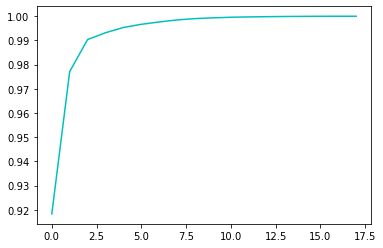

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='c')
plt.show()

Thus, to explain 95% of variance, only 2 pca components are necessary

In [26]:
pca=PCA(n_components=2)

In [27]:
X_pca=pca.fit_transform(Xs)

In [28]:
cols=list(Xs.columns)

In [29]:
pd.DataFrame(pca.components_.T,index=cols,columns=['PCA1','PCA2']) #Loading Values

,PCA1,PCA2
1990,0.228300,0.337651
1991,0.231154,0.316886
1992,0.232574,0.304301
1993,0.234419,0.282216
1994,0.236062,0.253358
1995,0.237776,0.228085
1996,0.237735,0.142674
1997,0.238681,0.083776
1998,0.240718,0.004213
1999,0.239793,-0.080743


**3. Clustering: Use PCA dimensions to cluster the data. Apply K-means and Agglomerative clustering.**
(30 Marks)
   Some pointers which would help you, but don’t be limited by these
   
      a. Find the optimal K Value. (5 marks)
      b. Apply Clustering and find out if the data points have been clustered correctly using appropriate visualization (20 marks)
     UNSUPERVISED LEARNING
     c. Evaluate the clusters formed using appropriate metrics to support the model built and compare both the models. (5 marks)

In [30]:
kmeans=KMeans()

ssd=[]
sscore=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=3)
    kmeans.fit(X_pca)
    ss1=kmeans.inertia_
    ssd.append(ss1)
    sscore1=silhouette_score(X_pca,kmeans.labels_)
    sscore.append(sscore1)  

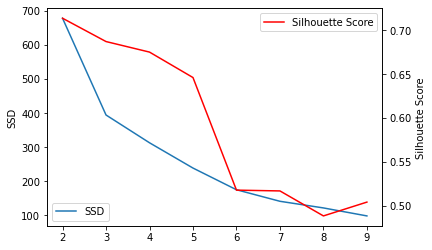

In [31]:
fig,ax=plt.subplots()
ax.plot(range(2,10),ssd, label='SSD')
ax.legend(loc="lower left")
ax.set_ylabel('SSD')
ax1=ax.twinx()
ax1.plot(range(2,10),sscore,'r', label='Silhouette Score')
ax1.legend(loc="upper right")
ax1.set_ylabel('Silhouette Score')
plt.show()

Inference:
Looking at the elbow diagram and silhouette score, number of clusters can be taken as 3.

In [32]:
model1=KMeans(n_clusters=3,n_init=15,random_state=42)
model1.fit(X_pca)

KMeans(n_clusters=3, n_init=15, random_state=42)

In [33]:
pd.Series(model1.labels_).value_counts()

0    99
2    38
1    13
dtype: int64

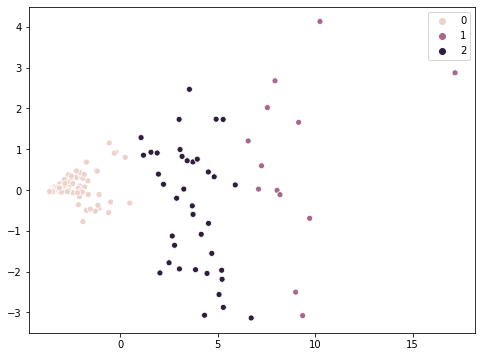

In [34]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=model1.labels_)
plt.show()

In [35]:
pd.DataFrame(model1.cluster_centers_)

,0,1
0,-2.590332,0.068280
1,9.019582,0.676844
2,3.662849,-0.409440


In [36]:
#Here in above, centroid values are 3 since there are 3 clusters(0,1,2) and are with regards to 2 principal components

Inference:
1. Cluster 0 -> Class 1, Cluster 1 -> Class 0, Cluster 2 -> Class 2
2. The clusters can be differentiated visually

In [37]:
X_model1=X_pca.copy()
X_model1=pd.DataFrame(X_model1)
X_model1['label']=model1.labels_

In [38]:
X_model1.rename(columns={0:'PC1',1:'PC2'},inplace=True)

In [39]:
X_model1['Country']=df['Country']
X_model1.head()

,PC1,PC2,label,Country
0,-2.969486,0.195390,0,Slovakia
1,2.497018,-1.781377,2,Burkina Faso
2,-1.092357,-0.446503,0,Kyrgyzstan
3,-3.376462,0.064713,0,Oman
4,-3.652555,-0.050841,0,Sweden


In [40]:
model2=KMeans(random_state=42)
wcss=[]
sil_score=[]
for k in range(2,15):
    model2=KMeans(n_clusters=k)
    model2.fit(Xs)
    wcss.append(model2.inertia_)
    sil_score.append(silhouette_score(Xs,model2.labels_))
    
print(wcss,'\n',sil_score)

[738.5078836240787, 454.37582791161907, 353.40762712851307, 280.8008501088642, 214.15558133714475, 179.4045646551753, 153.46126257195354, 131.3732586142145, 113.00958590398818, 104.91153647051208, 96.92733793668403, 90.40890602236178, 84.48136997251858] 
 [0.7000556083930032, 0.6681438440303382, 0.6577828705908593, 0.6193936149797983, 0.483546966332554, 0.47902077646407787, 0.475294554198692, 0.47403301963003497, 0.47478647465377416, 0.44581411870138427, 0.41045088799227536, 0.4001744604812044, 0.41670136577972783]


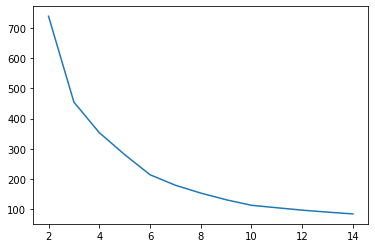

In [41]:
#Elbow plot
plt.plot(range(2,15),wcss)
plt.show()

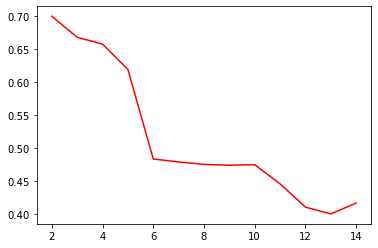

In [42]:
#Silhouette score
plt.plot(range(2,15),sil_score,color='r')
plt.show()

Inference:
Looking at the elbow diagram and silhouette score, number of clusters can be taken as 3.

In [43]:
model2=KMeans(n_clusters=3,n_init=15,random_state=42)
model2.fit(Xs)

KMeans(n_clusters=3, n_init=15, random_state=42)

In [44]:
pd.Series(model2.labels_).value_counts()

0    99
2    38
1    13
dtype: int64

In [45]:
pd.DataFrame(model2.cluster_centers_.T,index=cols)

,0,1,2
1990,-0.561905,2.329740,0.666895
1991,-0.568939,2.318191,0.689170
1992,-0.572544,2.307011,0.702386
1993,-0.580257,2.299612,0.725013
1994,-0.588905,2.291501,0.750319
1995,-0.593227,2.277870,0.766242
1996,-0.625111,2.219971,0.869114
1997,-0.626975,2.190561,0.884033
1998,-0.637636,2.148066,0.926345
1999,-0.646596,2.090946,0.969228


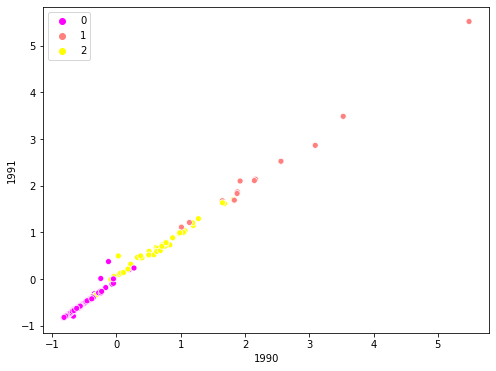

In [46]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=Xs['1990'],y=Xs['1991'],hue=model2.labels_,palette='spring')
plt.show()

Inference:
1. Cluster 0 -> Class 1, Cluster 1 -> Class 0, Cluster 2 -> Class 2
2. The clusters can not be differentiated visually

In [47]:
X_model2=Xs.copy()

In [48]:
X_model2_inv=sc.inverse_transform(X_model2)

In [49]:
X_model2['label']=model2.labels_

In [50]:
X_model2['Country']=df['Country']

In [51]:
X_model2.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,label,Country
0,-0.614746,-0.615878,-0.604477,-0.604925,-0.617116,-0.648068,-0.715525,-0.745026,-0.769974,-0.769639,-0.754876,-0.743829,-0.750760,-0.737317,-0.728779,-0.731639,-0.725827,-0.711397,0,Slovakia
1,-0.085651,-0.011257,0.049763,0.119661,0.187976,0.251429,0.351309,0.440760,0.541761,0.614251,0.759627,0.872982,1.007569,1.092859,1.129389,1.119753,1.082190,1.047955,2,Burkina Faso
2,-0.465404,-0.456085,-0.455187,-0.452851,-0.412431,-0.339010,-0.221138,-0.108119,-0.193446,-0.206958,-0.141156,-0.078927,-0.159886,-0.183142,-0.200521,-0.199364,-0.194057,-0.187725,0,Kyrgyzstan
3,-0.678749,-0.702252,-0.736203,-0.756998,-0.771766,-0.781840,-0.876851,-0.884834,-0.896916,-0.876092,-0.848914,-0.820364,-0.827002,-0.797858,-0.789018,-0.768667,-0.758196,-0.738959,0,Oman
4,-0.828091,-0.836132,-0.837194,-0.841981,-0.849091,-0.860258,-0.928892,-0.941793,-0.949809,-0.926784,-0.893458,-0.868199,-0.869888,-0.839770,-0.826089,-0.810324,-0.799813,-0.780301,0,Sweden


In [52]:
X_model2.groupby('label').mean()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
label,,,,,,,,,,,,,,,,,,
0,-0.561905,-0.568939,-0.572544,-0.580257,-0.588905,-0.593227,-0.625111,-0.626975,-0.637636,-0.646596,-0.645390,-0.635935,-0.623498,-0.631478,-0.621264,-0.615133,-0.607703,-0.602867
1,2.329740,2.318191,2.307011,2.299612,2.291501,2.277870,2.219971,2.190561,2.148066,2.090946,2.119558,2.125147,1.961692,1.910689,1.895397,1.922260,1.935512,1.929928
2,0.666895,0.689170,0.702386,0.725013,0.750319,0.766242,0.869114,0.884033,0.926345,0.969228,0.956299,0.929755,0.953271,0.991509,0.970131,0.944967,0.921077,0.910389


In [53]:
X_model2_inv=pd.DataFrame(X_model2_inv)

In [54]:
X_model2_inv.columns=Xs.columns

In [55]:
X_model2_inv['label']=model2.labels_

In [56]:
X_model2_inv['Country']=df['Country']

In [57]:
X_model2_inv.groupby('label').mean()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
label,,,,,,,,,,,,,,,,,,
0,67.383838,66.868687,66.272727,64.515152,62.202020,62.888889,63.373737,64.797980,63.020202,59.272727,54.121212,52.555556,55.707071,48.727273,48.202020,46.171717,45.545455,43.626263
1,745.076923,735.384615,722.076923,708.384615,695.461538,685.307692,610.076923,608.923077,589.692308,599.307692,612.769231,629.769231,598.230769,594.615385,591.307692,594.384615,595.538462,595.000000
2,355.368421,358.184211,356.631579,356.342105,356.631579,357.605263,350.500000,356.605263,358.710526,378.026316,377.736842,379.868421,386.605263,397.236842,391.631579,383.236842,376.157895,373.052632


### b.Agglomerative Heirarchical Clustering

In [59]:
#### 1. With PCA

from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist

In [60]:
for i in ['single','complete','average','ward']:
    linkage_matrix=linkage(X_pca,method=i,metric='euclidean')
    c,c_dis=cophenet(linkage_matrix,pdist(X_pca))
    print(i,'_cophenet_score: ',c)

single _cophenet_score:  0.7656032876528556
complete _cophenet_score:  0.8866934444407628
average _cophenet_score:  0.8542051939060292
ward _cophenet_score:  0.8060847180182494


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [60.0, 60.0, 100.0, 100.0],
  [20.0, 20.0, 80.0, 80.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [130.0, 130.0, 161.25, 161.25],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [242.5, 242.5, 280.0, 280.0],
  [203.75, 203.75, 261.25, 261.25],
  [145.625, 145.625, 232.5, 232.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 37

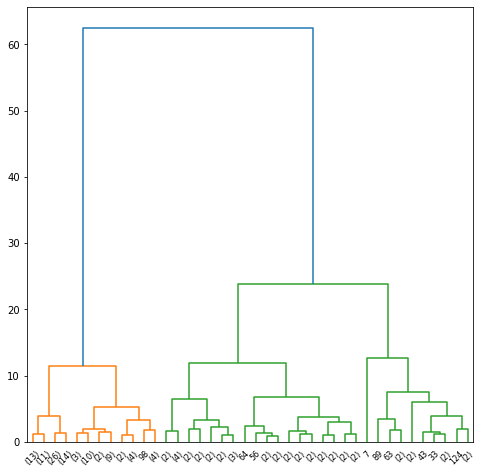

In [61]:
#Using ward linkage
linkage_matrix=linkage(X_pca,method='ward',metric='euclidean')
plt.figure(figsize=[8,8])
dendrogram(linkage_matrix,truncate_mode='lastp',p=40)

Inference: From Dendrogram, it can be seen that 3 cluster is a good choice. The cut can be made at 20.

In [62]:
#Applying Agglomerative clustering
model3=AgglomerativeClustering(3,linkage='ward')
model3.fit(X_pca)

AgglomerativeClustering(n_clusters=3)

In [63]:
pd.Series(model3.labels_).value_counts()

1    99
2    37
0    14
dtype: int64

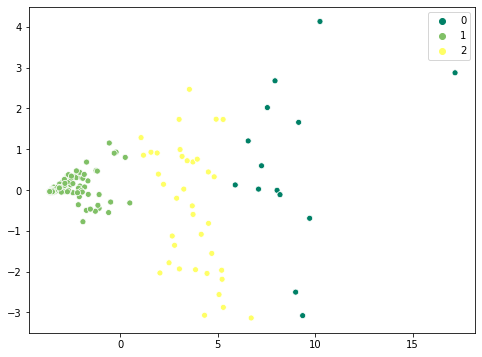

In [65]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=model3.labels_,palette='summer')
plt.show()

Inference:
1. Cluster 0 -> Class 0, Cluster 1 -> Class 1, Cluster 2 -> Class 2
2. The clusters can be differentiated visually except that there is one misclassification with regards to Class 2 and Class 0

In [66]:
#Adding the label column
X_model3=X_pca.copy()

In [67]:
X_model3=pd.DataFrame(X_model3)

In [68]:
X_model3['label']=model3.labels_

In [69]:
X_model3.rename(columns={0:'PC1',1:'PC2'},inplace=True)

In [70]:
X_model3['Country']=df['Country']

In [71]:
X_model3.head()

,PC1,PC2,label,Country
0,-2.969486,0.195390,1,Slovakia
1,2.497018,-1.781377,2,Burkina Faso
2,-1.092357,-0.446503,1,Kyrgyzstan
3,-3.376462,0.064713,1,Oman
4,-3.652555,-0.050841,1,Sweden


In [72]:
#### 2.Without PCA

for i in ['single','complete','average','ward']:
    linkage_matrix=linkage(Xs,method=i,metric='euclidean')
    c,c_dis=cophenet(linkage_matrix,pdist(Xs))
    print(i,'_cophenet_score: ',c)

single _cophenet_score:  0.7818680409006682
complete _cophenet_score:  0.8695857781912703
average _cophenet_score:  0.881888089796181
ward _cophenet_score:  0.7991814368402291


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [47.5, 47.5, 100.0, 100.0],
  [12.5, 12.5, 73.75, 73.75],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [230.0, 230.0, 260.0, 260.0],
  [210.0, 210.0, 245.0, 245.0],
  [180.0, 180.0, 227.5, 227.5],
  [140.0, 140.0, 203.75, 203.75],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365.0, 365.0],
  [385.0, 385.0, 395.0, 395.0],


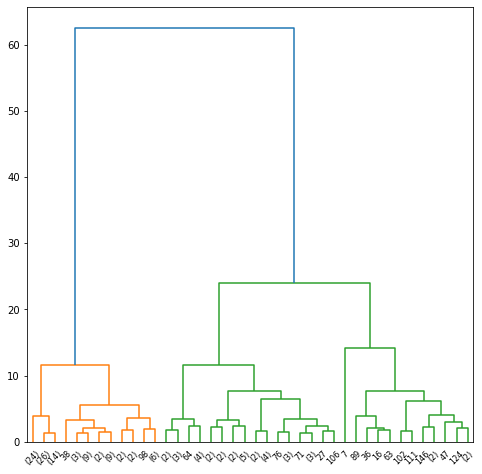

In [73]:
#Using ward linkage
linkage_matrix=linkage(Xs,method='ward',metric='euclidean')
plt.figure(figsize=[8,8])
dendrogram(linkage_matrix,truncate_mode='lastp',p=40)

Inference: From Dendrogram, it can be seen that 3 cluster is a good choice. The cut can be made at 20.

In [74]:
#Applying Agglomerative clustering
model4=AgglomerativeClustering(3,linkage='ward')
model4.fit(Xs)

AgglomerativeClustering(n_clusters=3)

In [75]:
pd.Series(model4.labels_).value_counts()

1    99
2    37
0    14
dtype: int64

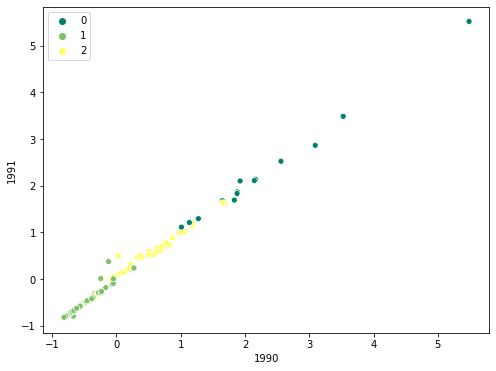

In [76]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=Xs['1990'],y=Xs['1991'],hue=model4.labels_,palette='summer')

Inference:
1. Cluster 0 -> Class 0, Cluster 1 -> Class 1, Cluster 2 -> Class 2
2. The clusters can not be differentiated visually.
3. There is one misclassification with regards to Class 2 and Class 0

In [77]:
X_model4=Xs.copy()
X_model4_inv=sc.inverse_transform(X_model4)
X_model4['label']=model4.labels_
X_model4['Country']=df['Country']
X_model4.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,label,Country
0,-0.614746,-0.615878,-0.604477,-0.604925,-0.617116,-0.648068,-0.715525,-0.745026,-0.769974,-0.769639,-0.754876,-0.743829,-0.750760,-0.737317,-0.728779,-0.731639,-0.725827,-0.711397,1,Slovakia
1,-0.085651,-0.011257,0.049763,0.119661,0.187976,0.251429,0.351309,0.440760,0.541761,0.614251,0.759627,0.872982,1.007569,1.092859,1.129389,1.119753,1.082190,1.047955,2,Burkina Faso
2,-0.465404,-0.456085,-0.455187,-0.452851,-0.412431,-0.339010,-0.221138,-0.108119,-0.193446,-0.206958,-0.141156,-0.078927,-0.159886,-0.183142,-0.200521,-0.199364,-0.194057,-0.187725,1,Kyrgyzstan
3,-0.678749,-0.702252,-0.736203,-0.756998,-0.771766,-0.781840,-0.876851,-0.884834,-0.896916,-0.876092,-0.848914,-0.820364,-0.827002,-0.797858,-0.789018,-0.768667,-0.758196,-0.738959,1,Oman
4,-0.828091,-0.836132,-0.837194,-0.841981,-0.849091,-0.860258,-0.928892,-0.941793,-0.949809,-0.926784,-0.893458,-0.868199,-0.869888,-0.839770,-0.826089,-0.810324,-0.799813,-0.780301,1,Sweden


In [78]:
X_model4.shape

(150, 20)

In [79]:
X_model4.groupby('label').mean()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
label,,,,,,,,,,,,,,,,,,
0,2.254436,2.244963,2.236419,2.232078,2.226696,2.215496,2.176823,2.147685,2.110780,2.051005,2.074742,2.074657,1.920429,1.869570,1.852929,1.875518,1.884469,1.875789
1,-0.561905,-0.568939,-0.572544,-0.580257,-0.588905,-0.593227,-0.625111,-0.626975,-0.637636,-0.646596,-0.645390,-0.635935,-0.623498,-0.631478,-0.621264,-0.615133,-0.607703,-0.602867
2,0.650446,0.672850,0.685728,0.708009,0.733186,0.748988,0.848931,0.864945,0.907434,0.954024,0.941817,0.916551,0.941630,0.982225,0.961193,0.936240,0.912974,0.903319


In [80]:
X_model4_inv=pd.DataFrame(X_model4_inv)
X_model4_inv.columns=Xs.columns
X_model4_inv['label']=model4.labels_
X_model4_inv['Country']=df['Country']

In [81]:
X_model4_inv.groupby('label').mean()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
label,,,,,,,,,,,,,,,,,,
0,727.428571,718.428571,706.000000,693.285714,681.214286,671.785714,601.785714,600.642857,582.642857,591.428571,603.714286,619.214286,589.571429,585.785714,582.142857,584.285714,584.500000,583.214286
1,67.383838,66.868687,66.272727,64.515152,62.202020,62.888889,63.373737,64.797980,63.020202,59.272727,54.121212,52.555556,55.707071,48.727273,48.202020,46.171717,45.545455,43.626263
2,351.513514,354.405405,352.837838,352.540541,352.864865,353.864865,346.621622,352.918919,355.135135,375.027027,374.810811,377.108108,384.162162,395.243243,389.702703,381.351351,374.405405,371.513514


Inference:
After considering all 4 models, we can go with model1 where in Clusters are formed post application of PCA using Kmeans.

## PART 4 - PCA model

In [82]:
X_model1.head()

,PC1,PC2,label,Country
0,-2.969486,0.195390,0,Slovakia
1,2.497018,-1.781377,2,Burkina Faso
2,-1.092357,-0.446503,0,Kyrgyzstan
3,-3.376462,0.064713,0,Oman
4,-3.652555,-0.050841,0,Sweden


In [83]:
X=X_model1.drop(['label','Country'],axis=1)
y=X_model1['label']

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [85]:
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.3, random_state=42)

In [86]:
import scipy.stats as st

In [87]:
st.ttest_ind(X,X_train)

Ttest_indResult(statistic=array([ 0.05233868, -0.27179628]), pvalue=array([0.95830013, 0.78600032]))

In [88]:
st.ttest_ind(X,X_test)

Ttest_indResult(statistic=array([-0.09253869,  0.46986931]), pvalue=array([0.92636604, 0.63897885]))

In [89]:
st.ttest_ind(y,y_test)

Ttest_indResult(statistic=-0.4923799137791641, pvalue=0.6230104322667763)

In [90]:
st.ttest_ind(y,y_train)

Ttest_indResult(statistic=0.28650279900203307, pvalue=0.7747275244634677)

All the pvalues are greater than 0.05 and hence there is no significant difference in the means. Thus correct
representation of the complete data

In [91]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.80      1.00      0.89         4
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.93      0.97      0.95        45
weighted avg       0.98      0.98      0.98        45



In [92]:
## PART 4 - Non PCA model

X_model2.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,label,Country
0,-0.614746,-0.615878,-0.604477,-0.604925,-0.617116,-0.648068,-0.715525,-0.745026,-0.769974,-0.769639,-0.754876,-0.743829,-0.750760,-0.737317,-0.728779,-0.731639,-0.725827,-0.711397,0,Slovakia
1,-0.085651,-0.011257,0.049763,0.119661,0.187976,0.251429,0.351309,0.440760,0.541761,0.614251,0.759627,0.872982,1.007569,1.092859,1.129389,1.119753,1.082190,1.047955,2,Burkina Faso
2,-0.465404,-0.456085,-0.455187,-0.452851,-0.412431,-0.339010,-0.221138,-0.108119,-0.193446,-0.206958,-0.141156,-0.078927,-0.159886,-0.183142,-0.200521,-0.199364,-0.194057,-0.187725,0,Kyrgyzstan
3,-0.678749,-0.702252,-0.736203,-0.756998,-0.771766,-0.781840,-0.876851,-0.884834,-0.896916,-0.876092,-0.848914,-0.820364,-0.827002,-0.797858,-0.789018,-0.768667,-0.758196,-0.738959,0,Oman
4,-0.828091,-0.836132,-0.837194,-0.841981,-0.849091,-0.860258,-0.928892,-0.941793,-0.949809,-0.926784,-0.893458,-0.868199,-0.869888,-0.839770,-0.826089,-0.810324,-0.799813,-0.780301,0,Sweden


In [93]:
X=X_model2.drop(['label','Country'],axis=1)
y=X_model2['label']

In [94]:
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.3, random_state=42)

In [96]:
#Representative of overall data
print(st.ttest_ind(X,X_train)[1])
print(st.ttest_ind(X,X_test)[1])
print(st.ttest_ind(y,y_test)[1])
print(st.ttest_ind(y,y_train)[1])

[0.93432683 0.95050117 0.9503089  0.95848925 0.92754309 0.96925725
 0.89531187 0.89909979 0.90751221 0.89881087 0.90439562 0.87987396
 0.99805433 0.93253037 0.89628512 0.92059416 0.88673675 0.94858719]
[0.88153619 0.91026046 0.90971663 0.9245063  0.86853981 0.94409735
 0.81928004 0.82659918 0.84149827 0.82909009 0.83659452 0.79499563
 0.99657307 0.88236723 0.81903186 0.86027147 0.80167835 0.90875193]
0.6230104322667763
0.7747275244634677


All the pvalues are greater than 0.05 and hence there is no significant difference in the means. Thus correct representation of the complete data

In [97]:
rfc=RandomForestClassifier()

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      1.00      1.00         4
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.99      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [98]:
X_model2_inv

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,label,Country
0,55.0,56.0,59.0,59.0,56.0,51.0,46.0,42.0,38.0,35.0,32.0,30.0,29.0,26.0,25.0,21.0,20.0,20.0,0,Slovakia
1,179.0,196.0,208.0,221.0,233.0,246.0,251.0,271.0,286.0,308.0,338.0,368.0,398.0,419.0,426.0,421.0,411.0,403.0,2,Burkina Faso
2,90.0,93.0,93.0,93.0,101.0,118.0,141.0,165.0,147.0,146.0,156.0,169.0,153.0,145.0,139.0,136.0,135.0,134.0,0,Kyrgyzstan
3,40.0,36.0,29.0,25.0,22.0,22.0,15.0,15.0,14.0,14.0,13.0,14.0,13.0,13.0,12.0,13.0,13.0,14.0,0,Oman
4,5.0,5.0,6.0,6.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,0,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,380.0,379.0,379.0,378.0,377.0,376.0,372.0,388.0,397.0,424.0,420.0,430.0,443.0,441.0,454.0,456.0,461.0,468.0,2,Senegal
146,436.0,456.0,494.0,526.0,556.0,585.0,602.0,626.0,634.0,657.0,658.0,680.0,517.0,478.0,468.0,453.0,422.0,387.0,1,Zambia
147,109.0,100.0,79.0,80.0,76.0,78.0,88.0,101.0,118.0,122.0,115.0,113.0,113.0,120.0,126.0,136.0,146.0,155.0,0,Suriname
148,430.0,428.0,427.0,426.0,424.0,422.0,421.0,421.0,415.0,420.0,413.0,406.0,376.0,355.0,333.0,289.0,260.0,223.0,2,Pakistan


In [99]:
X_model2_inv['label'].value_counts()

0    99
2    38
1    13
Name: label, dtype: int64

Inference:
1. In country of Slovakia, TB Class_1 is prevalent and the number of people for every 1,00,000 people contracting it has gone down over a period of time. There were 55 peole in the year of 1990 but in 2007 it is 20.
2. Class_0 type of TB is least prevalent TB and is only present in 13 countries but has affected high number of people in that particular country
3. Class_1 TB is most prevalent and present in 99 countries but the infection rate is very low.
4. Class_0 is that type of TB which causes maximum destruction/infection and can be considered to be highly severe strain

In [100]:
M=X_model2_inv.groupby('label').mean().T.reset_index() #Cluster 0 -> Class 1, Cluster 1 -> Class 0, Cluster 2 -> Class 2

In [101]:
M.rename(columns={'label':'index','index':'year',0:'Class_1',1:'Class_0',2:'Class_2'},inplace=True)

In [102]:
M.head()

label,year,Class_1,Class_0,Class_2
0,1990,67.383838,745.076923,355.368421
1,1991,66.868687,735.384615,358.184211
2,1992,66.272727,722.076923,356.631579
3,1993,64.515152,708.384615,356.342105
4,1994,62.202020,695.461538,356.631579


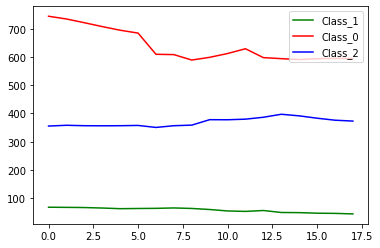

In [103]:
M['Class_1'].plot(kind='line',color='green')
M['Class_0'].plot(kind='line',color='red')
M['Class_2'].plot(kind='line',color='blue')
plt.legend()
plt.show()